In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

### Importing Dataset

In [2]:
df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [1]:
sns.boxplot(df['creatinine_phosphokinase'])

NameError: name 'sns' is not defined

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

### Checking Null Value

In [11]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [13]:
x = df.drop(['DEATH_EVENT'],axis = 1)

y = df['DEATH_EVENT']

In [6]:
# !pip install scikit-learn

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.20)

### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier  # load Decision libraries
 
dtc = DecisionTreeClassifier()   # create a decision tree class

dtc.fit(xtrain,ytrain)

dtc.score(xtest,ytest)

0.65

### Scope hyper parameter tuing for DT

In [16]:
pred_dtc = dtc.predict(xtest)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest,pred_dtc)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(ytest,pred_dtc))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(ytest,pred_dtc))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred_dtc))

Confusion Matrix : 
 [[25 10]
 [11 14]]
Accuracy :  0.65
specificity1 :  0.7142857142857143
Sensitivity :  0.56
MCC :  0.2760262237369417
AUC :  0.6371428571428571
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        35
           1       0.58      0.56      0.57        25

    accuracy                           0.65        60
   macro avg       0.64      0.64      0.64        60
weighted avg       0.65      0.65      0.65        60



### K-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 9)

knn.fit(xtrain,ytrain)

knn.score(xtest,ytest)

0.5833333333333334

In [ ]:
# Scopre of hyper parameter tuning

In [18]:
pred_knn = knn.predict(xtest)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest,pred_knn)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(ytest,pred_knn))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(ytest,pred_knn))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred_knn))

Confusion Matrix : 
 [[32  3]
 [22  3]]
Accuracy :  0.5833333333333334
specificity1 :  0.9142857142857143
Sensitivity :  0.12
MCC :  0.0563436169819011
AUC :  0.5171428571428571
              precision    recall  f1-score   support

           0       0.59      0.91      0.72        35
           1       0.50      0.12      0.19        25

    accuracy                           0.58        60
   macro avg       0.55      0.52      0.46        60
weighted avg       0.55      0.58      0.50        60



### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(xtrain,ytrain)

rfc.score(xtest,ytest)

0.75

#### Scope of hyper parameter tuning  and corss validations

In [20]:
pred_rfc = rfc.predict(xtest)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest,pred_rfc)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(ytest,pred_rfc))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(ytest,pred_rfc))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred_rfc))

Confusion Matrix : 
 [[29  6]
 [ 9 16]]
Accuracy :  0.75
specificity1 :  0.8285714285714286
Sensitivity :  0.64
MCC :  0.47937644619880754
AUC :  0.7342857142857142
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.73      0.64      0.68        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.74        60
weighted avg       0.75      0.75      0.75        60



### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(xtrain,ytrain)

logReg.score(xtest,ytest)

0.8

#### scope of  hyper parameter tuning and cross validations

In [22]:
pred_logReg = logReg.predict(xtest)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest,pred_logReg)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(ytest,pred_logReg))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(ytest,pred_logReg))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred_logReg))

Confusion Matrix : 
 [[31  4]
 [ 8 17]]
Accuracy :  0.8
specificity1 :  0.8857142857142857
Sensitivity :  0.68
MCC :  0.5847351773491256
AUC :  0.7828571428571428
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        35
           1       0.81      0.68      0.74        25

    accuracy                           0.80        60
   macro avg       0.80      0.78      0.79        60
weighted avg       0.80      0.80      0.80        60



### Support Vector Machine (Linear)

In [23]:
from sklearn.svm import SVC

svml = SVC(kernel = 'linear')

svml.fit(xtrain,ytrain)

svml.score(xtest,ytest)

0.7833333333333333

#### scope of  hyper parameter tuning and cross validations

In [24]:
pred_svml = svml.predict(xtest)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest,pred_svml)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(ytest,pred_svml))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(ytest,pred_svml))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred_svml))

Confusion Matrix : 
 [[32  3]
 [10 15]]
Accuracy :  0.7833333333333333
specificity1 :  0.9142857142857143
Sensitivity :  0.6
MCC :  0.5532833351724881
AUC :  0.7571428571428571
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        35
           1       0.83      0.60      0.70        25

    accuracy                           0.78        60
   macro avg       0.80      0.76      0.76        60
weighted avg       0.79      0.78      0.78        60



### Support Vector Machine (RBF)

In [25]:
from sklearn.svm import SVC

svmr = SVC(kernel = 'rbf')

svmr.fit(xtrain,ytrain)

svmr.score(xtest,ytest)

0.5833333333333334

### scope of  hyper parameter tuning and cross validations

In [26]:
pred_svmr = svmr.predict(xtest)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest,pred_svmr)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(ytest,pred_svmr))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(ytest,pred_svmr))

from sklearn.metrics import classification_report

print(classification_report(ytest, pred_svmr))

Confusion Matrix : 
 [[35  0]
 [25  0]]
Accuracy :  0.5833333333333334
specificity1 :  1.0
Sensitivity :  0.0
MCC :  0.0
AUC :  0.5
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       0.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.29      0.50      0.37        60
weighted avg       0.34      0.58      0.43        60



C:\Users\panka\anaconda33\envs\cv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\panka\anaconda33\envs\cv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\panka\anaconda33\envs\cv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyper Parameter tuning 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
#from sklearn.cross_validation import KFold, cross_val_score, train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [29]:
# Define parameters for optimization using dictionaries {parameter name: parameter list}

# SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
KNN_params = {'n_neighbors':[1,5,10,9,20, 50], 'p':[2], 'metric':['minkowski']}
RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy', 'gini'], 'max_depth':[10, 50, 100]}

In [30]:
# Append list of models with parameter dictionaries

models_opt = []

models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
# models_opt.append(('SVM', SVC(), SVM_params))

In [31]:
models_opt

[('LR', LogisticRegression(), {'C': [0.001, 0.1, 1, 10, 100]}),
 ('LDA',
  LinearDiscriminantAnalysis(),
  {'n_components': [None, 1, 2, 3], 'solver': ['svd'], 'shrinkage': [None]}),
 ('KNN',
  KNeighborsClassifier(),
  {'n_neighbors': [1, 5, 10, 9, 20, 50], 'p': [2], 'metric': ['minkowski']}),
 ('DTC',
  DecisionTreeClassifier(),
  {'criterion': ['entropy', 'gini'], 'max_depth': [10, 50, 100]}),
 ('RFC', RandomForestClassifier(), {'n_estimators': [10, 50, 100]})]

In [32]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation.KFold(n=4, n_folds=2, shuffle=False,random_state=None)
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)

In [33]:
import time
start = time.time()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25 , random_state = 0)
end = time.time()
print("Time consumed in working: ",end - start)

Time consumed in working:  0.001998424530029297


In [34]:
results = []
names = []


def estimator_function(parameter_dictionary, scoring = 'accuracy'):
    
    
    for name, model, params in models_opt:
    
        #kfold = KFold(len(X_train), n_folds=5, random_state=2, shuffle=True)
        skfold=StratifiedKFold(n_splits=5)
        leave_validation=LeaveOneOut()

        model_grid = GridSearchCV(model, params)

        cv_results = cross_val_score(model_grid, X_train, Y_train, cv =leave_validation, scoring=scoring)

        results.append(cv_results)

        names.append(name)

        msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())

        print(msg)

In [35]:
estimator_function(models_opt, scoring = 'accuracy')

Cross Validation Accuracy LR: Accarcy: 0.843750 SD: 0.363092
Cross Validation Accuracy LDA: Accarcy: 0.848214 SD: 0.358813
Cross Validation Accuracy KNN: Accarcy: 0.687500 SD: 0.463512
Cross Validation Accuracy DTC: Accarcy: 0.767857 SD: 0.422200
Cross Validation Accuracy RFC: Accarcy: 0.839286 SD: 0.367267


In [ ]:
# leave_validation=LeaveOneOut()  
Cross Validation Accuracy LR: Accarcy: 0.751736 SD: 0.432006
Cross Validation Accuracy LDA: Accarcy: 0.750000 SD: 0.433013
Cross Validation Accuracy KNN: Accarcy: 0.701389 SD: 0.457649
Cross Validation Accuracy DTC: Accarcy: 0.637153 SD: 0.480821
Cross Validation Accuracy RFC: Accarcy: 0.736111 SD: 0.440740

In [38]:
from contextlib import contextmanager
@contextmanager
def timer():
    """Helper for measuring runtime"""

    time0 =  time.perf_counter()
    
    yield
    print('[elapsed time: %.18f s]' % (time.perf_counter() - time0))

## Random Forest

In [36]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [39]:
with timer() as t:
    rf=RandomForestClassifier()
    rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
    rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[elapsed time: 112.537697399999842673 s]


In [72]:
# rf=RandomForestClassifier()
# rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
#                                random_state=100,n_jobs=-1)
# ### fit the randomized model
# rf_randomcv.fit(X_train,Y_train)

In [40]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 780,
 'criterion': 'gini'}

In [41]:
best_random_grid=rf_randomcv.best_estimator_

In [42]:
from sklearn.metrics import accuracy_score
y_predRM=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,y_predRM))
print("Training Accuracy Score {}".format(best_random_grid.score(X_train,Y_train)))
print("Testing Accuracy Score {}".format(accuracy_score(Y_test,y_predRM)))
print("Classification report: {}".format(classification_report(Y_test,y_predRM)))

[[46  2]
 [10 17]]
Training Accuracy Score 0.9285714285714286
Testing Accuracy Score 0.84
Classification report:               precision    recall  f1-score   support

           0       0.82      0.96      0.88        48
           1       0.89      0.63      0.74        27

    accuracy                           0.84        75
   macro avg       0.86      0.79      0.81        75
weighted avg       0.85      0.84      0.83        75



In [43]:
# Random forest
cm1 = confusion_matrix(Y_test,y_predRM)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,y_predRM))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,y_predRM))

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predRM))

Confusion Matrix : 
 [[46  2]
 [10 17]]
Accuracy :  0.84
specificity1 :  0.9583333333333334
Sensitivity :  0.6296296296296297
MCC :  0.6489058009549221
AUC :  0.7939814814814816
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        48
           1       0.89      0.63      0.74        27

    accuracy                           0.84        75
   macro avg       0.86      0.79      0.81        75
weighted avg       0.85      0.84      0.83        75



<img src="../images/confusion_Matrix.jpeg" width="70%">

In [44]:
# Confusion Matrix : 
# Confusion Matrix : 
#  [[46  2]
#  [10 17]]
TP = 46
FP = 2
FN = 10
TN = 17

In [45]:
# Random forest
def fun(TP,FN,FP,TN):
    print("Random Forest on Heart Failure")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))

In [46]:
fun(TP,FN,FP,TN)

Random Forest on Heart Failure
TP 46
FN 10
FP 2
TN 17
Accuracy : 0.84
Precision : 0.9583333333333334
Recall : 0.8214285714285714 
F1_score : 0.8846153846153847
TPR : 0.9583333333333334
FPR : 0.10526315789473684


# SVM ( RBF)

In [47]:
from contextlib import contextmanager
@contextmanager
def timer():
    """Helper for measuring runtime"""

    time0 =  time.perf_counter()
    
    yield
    print('[elapsed time: %.18f s]' % (time.perf_counter() - time0))

In [48]:
from sklearn.metrics import classification_report # make predictions on validation datasets
import time
with timer() as t:
    SVM = SVC(C=1.0,
    kernel='rbf',
    degree=6,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None)
    
    SVM.fit(X_train, Y_train)
    y_predSVM_rbf= SVM.predict(X_test)
    print(("training score : {}").format(SVM.score(X_train, Y_train)))
    print(("testing score : {}").format(accuracy_score(Y_test, y_predSVM_rbf)))
    print(classification_report(Y_test, y_predSVM_rbf))
    print(confusion_matrix(Y_test, y_predSVM_rbf))

training score : 0.6919642857142857
testing score : 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        48
           1       0.00      0.00      0.00        27

    accuracy                           0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75

[[48  0]
 [27  0]]
[elapsed time: 0.041195199999947363 s]


In [49]:
# SVM with RBF
cm1 = confusion_matrix(Y_test,y_predSVM_rbf)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,y_predSVM_rbf))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,y_predSVM_rbf))

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predSVM_rbf))

Confusion Matrix : 
 [[48  0]
 [27  0]]
Accuracy :  0.64
specificity1 :  1.0
Sensitivity :  0.0
MCC :  0.0
AUC :  0.5
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        48
           1       0.00      0.00      0.00        27

    accuracy                           0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



In [51]:
# SVM with RBF
# Confusion Matrix : 
#  [[48  0]
#  [27  0]]
TP1 = 48
FP1 = 0
FN1 = 27
TN1 = 0


def fun1(TP,FN,FP,TN):
    
    print("SVM on Heart Failure ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))

In [52]:
fun1(TP1,FN1,FP1,TN1)

SVM on Heart Failure ---------------------->
TP 48
FN 27
FP 0
TN 0
Accuracy : 0.64
Precision : 1.0
Recall : 0.64 
F1_score : 0.7804878048780487
TPR : 1.0


ZeroDivisionError: division by zero

In [ ]:
Observations : 

# SVM (LINEAR)

#### 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']

In [53]:
from sklearn.metrics import classification_report # make predictions on validation datasets
import time
with timer() as t:
    SVM = SVC(C=1.0,
    kernel='linear',
    degree=6,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None)
    
    SVM.fit(X_train, Y_train)
    y_predSVM_linear= SVM.predict(X_test)
    print(("training score : {}").format(SVM.score(X_train, Y_train)))
    print(("testing score : {}").format(accuracy_score(Y_test, y_predSVM_linear)))
    print(classification_report(Y_test, y_predSVM_linear))
    print(confusion_matrix(Y_test, y_predSVM_linear))

training score : 0.8303571428571429
testing score : 0.7733333333333333
              precision    recall  f1-score   support

           0       0.78      0.90      0.83        48
           1       0.75      0.56      0.64        27

    accuracy                           0.77        75
   macro avg       0.77      0.73      0.74        75
weighted avg       0.77      0.77      0.76        75

[[43  5]
 [12 15]]
[elapsed time: 22.938388099999883707 s]


In [54]:
# SVM with RBF
cm1 = confusion_matrix(Y_test,y_predSVM_linear)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,y_predSVM_linear))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,y_predSVM_linear))

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predSVM_linear))

Confusion Matrix : 
 [[43  5]
 [12 15]]
Accuracy :  0.7733333333333333
specificity1 :  0.8958333333333334
Sensitivity :  0.5555555555555556
MCC :  0.48995593493886586
AUC :  0.7256944444444445
              precision    recall  f1-score   support

           0       0.78      0.90      0.83        48
           1       0.75      0.56      0.64        27

    accuracy                           0.77        75
   macro avg       0.77      0.73      0.74        75
weighted avg       0.77      0.77      0.76        75



In [55]:
#Confusion Matrix : 
#  [[43  5]
#  [12 15]]
TP2 = 43
FP2 = 5
FN2 = 12
TN2 = 15


def fun1(TP,FN,FP,TN):
    
    print("SVM on BCWD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))

In [56]:
fun1(TP2,FP2,FN2,TN2)

SVM on BCWD ---------------------->
TP 43
FN 5
FP 12
TN 15
Accuracy : 0.7733333333333333
Precision : 0.7818181818181819
Recall : 0.8958333333333334 
F1_score : 0.8349514563106797
TPR : 0.7818181818181819
FPR : 0.4444444444444444


# SVM ('sigmoid')

In [57]:
from sklearn.metrics import classification_report # make predictions on validation datasets
import time
with timer() as t:
    SVM = SVC(C=1.0,
    kernel='sigmoid',
    degree=6,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None)
    
    SVM.fit(X_train, Y_train)
    y_predSVM_sigmoid= SVM.predict(X_test)
    print(("training score : {}").format(SVM.score(X_train, Y_train)))
    print(("testing score : {}").format(accuracy_score(Y_test, y_predSVM_sigmoid)))
    print(classification_report(Y_test, y_predSVM_sigmoid))
    print(confusion_matrix(Y_test, y_predSVM_sigmoid))

training score : 0.6919642857142857
testing score : 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        48
           1       0.00      0.00      0.00        27

    accuracy                           0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75

[[48  0]
 [27  0]]
[elapsed time: 0.037832799999932831 s]


In [58]:
# SVM with RBF
cm1 = confusion_matrix(Y_test,y_predSVM_sigmoid)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,y_predSVM_sigmoid))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,y_predSVM_sigmoid))

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predSVM_sigmoid))

Confusion Matrix : 
 [[48  0]
 [27  0]]
Accuracy :  0.64
specificity1 :  1.0
Sensitivity :  0.0
MCC :  0.0
AUC :  0.5
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        48
           1       0.00      0.00      0.00        27

    accuracy                           0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



In [59]:
# observations : here sigmoid kernel performed very bad 

# SVM (poly)

In [60]:
from sklearn.metrics import classification_report # make predictions on validation datasets
import time
with timer() as t:
    SVM = SVC(C=1.0,
    kernel='poly',
    degree=6,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None)
    
    SVM.fit(X_train, Y_train)
    y_predSVM_poly= SVM.predict(X_test)
    print(("training score : {}").format(SVM.score(X_train, Y_train)))
    print(("testing score : {}").format(accuracy_score(Y_test, y_predSVM_poly)))
    print(classification_report(Y_test, y_predSVM_poly))
    print(confusion_matrix(Y_test, y_predSVM_poly))

training score : 0.6919642857142857
testing score : 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        48
           1       0.00      0.00      0.00        27

    accuracy                           0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75

[[48  0]
 [27  0]]
[elapsed time: 0.186212100000147984 s]


In [61]:
# SVM with RBF
cm1 = confusion_matrix(Y_test,y_predSVM_poly)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,y_predSVM_poly))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,y_predSVM_poly))

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predSVM_poly))

Confusion Matrix : 
 [[48  0]
 [27  0]]
Accuracy :  0.64
specificity1 :  1.0
Sensitivity :  0.0
MCC :  0.0
AUC :  0.5
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        48
           1       0.00      0.00      0.00        27

    accuracy                           0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



In [101]:
# Confusion Matrix : 
#  [[122   8]
#  [ 38  24]]
TP3 = 122
FP3 = 8
FN3 = 38
TN3 = 24


def fun1(TP,FN,FP,TN):
    
    print("SVM on PIDDD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))

In [102]:
fun1(TP3,FN3,FP3,TN3)

SVM on PIDDD ---------------------->
TP 122
FN 38
FP 8
TN 24
Accuracy : 0.7604166666666666
Precision : 0.9384615384615385
Recall : 0.7625 
F1_score : 0.8413793103448275
TPR : 0.9384615384615385
FPR : 0.25


# SVM ('precomputed')

In [62]:
from sklearn.metrics import classification_report # make predictions on validation datasets
import time
with timer() as t:
    SVM = SVC(C=1.0,
    kernel='precomputed',
    degree=6,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None)
    
    gram_train = np.dot(X_train, X_train.T)
    SVM.fit(gram_train, Y_train)
    gram_test = np.dot(X_test, X_train.T)
    y_predSVM_precomputed= SVM.predict(gram_test)
#     gram_score = np.dot(X_train, Y_train)
#     print(("training score : {}").format(SVM.score(gram_score)))
    print(("testing score : {}").format(accuracy_score(Y_test, y_predSVM_precomputed)))
    print(classification_report(Y_test, y_predSVM_precomputed))
    print(confusion_matrix(Y_test, y_predSVM_precomputed))

testing score : 0.7733333333333333
              precision    recall  f1-score   support

           0       0.78      0.90      0.83        48
           1       0.75      0.56      0.64        27

    accuracy                           0.77        75
   macro avg       0.77      0.73      0.74        75
weighted avg       0.77      0.77      0.76        75

[[43  5]
 [12 15]]
[elapsed time: 26.408041300000149931 s]


In [63]:
# SVM with precomputed
cm1 = confusion_matrix(Y_test,y_predSVM_precomputed)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,y_predSVM_precomputed))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,y_predSVM_precomputed))

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predSVM_precomputed))

Confusion Matrix : 
 [[43  5]
 [12 15]]
Accuracy :  0.7733333333333333
specificity1 :  0.8958333333333334
Sensitivity :  0.5555555555555556
MCC :  0.48995593493886586
AUC :  0.7256944444444445
              precision    recall  f1-score   support

           0       0.78      0.90      0.83        48
           1       0.75      0.56      0.64        27

    accuracy                           0.77        75
   macro avg       0.77      0.73      0.74        75
weighted avg       0.77      0.77      0.76        75



In [64]:
# Confusion Matrix : 
#  [[43  5]
#  [12 15]]
TP4 = 43
FP4 = 5
FN4 = 12
TN4 = 15


def fun1(TP,FN,FP,TN):
    
    print("SVM on PIDDD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))
    
fun1(TP4,FN4,FP4,TN4)

SVM on PIDDD ---------------------->
TP 43
FN 12
FP 5
TN 15
Accuracy : 0.7733333333333333
Precision : 0.8958333333333334
Recall : 0.7818181818181819 
F1_score : 0.8349514563106797
TPR : 0.8958333333333334
FPR : 0.25


# Logistic Regression ( LR )

In [65]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [66]:
with timer() as t:
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    

[elapsed time: 0.024585600000136765 s]


In [67]:
log.score(X_train,Y_train)

0.8526785714285714

In [68]:
pred_logReg = log.predict(X_test)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test,pred_logReg)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,pred_logReg))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,pred_logReg))

from sklearn.metrics import classification_report

print(classification_report(Y_test, pred_logReg))

Confusion Matrix : 
 [[44  4]
 [15 12]]
Accuracy :  0.7466666666666667
specificity1 :  0.9166666666666666
Sensitivity :  0.4444444444444444
MCC :  0.4231139606876776
AUC :  0.6805555555555555
              precision    recall  f1-score   support

           0       0.75      0.92      0.82        48
           1       0.75      0.44      0.56        27

    accuracy                           0.75        75
   macro avg       0.75      0.68      0.69        75
weighted avg       0.75      0.75      0.73        75



In [119]:
# Confusion Matrix : 
#  [[115  15]
#  [ 25  37]]
TP5 = 115
FP5 = 15
FN5 = 25
TN5 = 37


def fun1(TP,FN,FP,TN):
    
    print("SVM on PIDDD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))
    
fun1(TP5,FN5,FP5,TN5)

SVM on PIDDD ---------------------->
TP 115
FN 25
FP 15
TN 37
Accuracy : 0.7916666666666666
Precision : 0.8846153846153846
Recall : 0.8214285714285714 
F1_score : 0.8518518518518519
TPR : 0.8846153846153846
FPR : 0.28846153846153844


### Hyper parameter tuning on  LR

In [69]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# sklearn.cross_validation.KFold(n=4, n_folds=2, shuffle=False,
#                                random_state=None)
from sklearn.model_selection import StratifiedKFold
#skfold=StratifiedKFold(n_splits=5)


In [70]:
import numpy as np
#range(0,1)
np.linspace(0,1)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [71]:
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(1, 2, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
     'dual' : [True,False],
     'multi_class' : ['auto', 'ovr', 'multinomial'],
    
    }
]

In [72]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 4, verbose=True, n_jobs=-1)

In [73]:
best_clf = clf.fit(X_train,Y_train)

Fitting 4 folds for each of 9600 candidates, totalling 38400 fits


In [171]:
best_clf.best_estimator_

LogisticRegression(C=54.5559478116852, multi_class='multinomial')

In [172]:
pred_logReg1 = best_clf.predict(X_test)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test,pred_logReg1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,pred_logReg1))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,pred_logReg1))

from sklearn.metrics import classification_report

print(classification_report(Y_test, pred_logReg1))

Confusion Matrix : 
 [[117  13]
 [ 24  38]]
Accuracy :  0.8072916666666666
specificity1 :  0.9
Sensitivity :  0.6129032258064516
MCC :  0.5430105994571142
AUC :  0.7564516129032258
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       130
           1       0.75      0.61      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.80      0.81      0.80       192



In [173]:
# Confusion Matrix : 
#  [[118  12]
#  [ 26  36]]
TP6 = 118
FP6 = 12
FN6 = 26
TN6 = 36


def fun1(TP,FN,FP,TN):
    
    print("SVM on PIDDD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))
    
fun1(TP6,FN6,FP6,TN6)

SVM on PIDDD ---------------------->
TP 118
FN 26
FP 12
TN 36
Accuracy : 0.8020833333333334
Precision : 0.9076923076923077
Recall : 0.8194444444444444 
F1_score : 0.8613138686131386
TPR : 0.9076923076923077
FPR : 0.25


# KNN 
# Herparameter Optimization for K value

In [186]:
error = []
# Calculating error for k between 1 and 60
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, '<---------------------------mean Error----------------------------->')

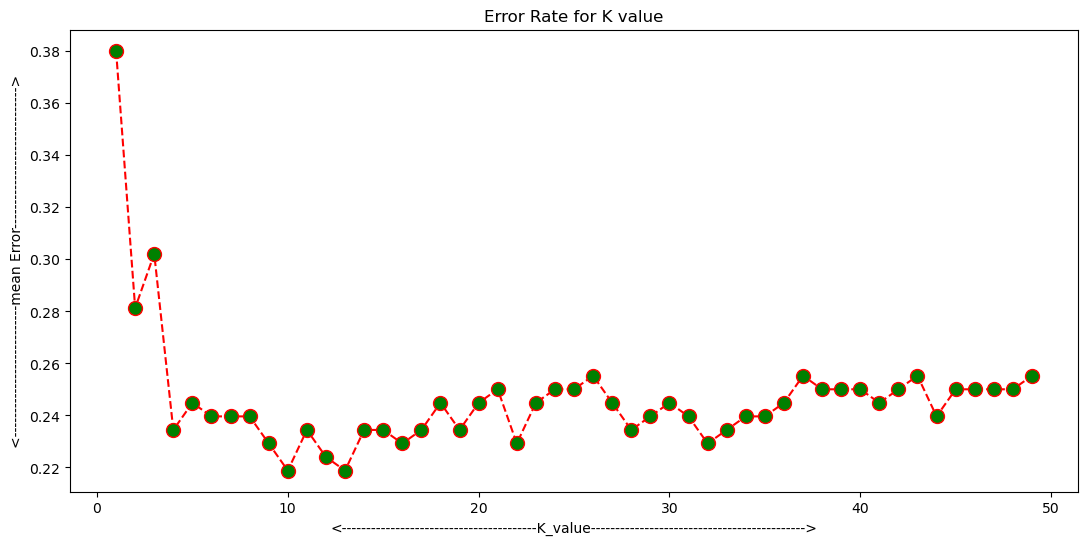

In [189]:
plt.figure(figsize=(13,6))
plt.plot(range(1,50),error,color='red',linestyle='dashed',marker='o', markerfacecolor='green', markersize = 10)
plt.title("Error Rate for K value")
plt.xlabel('<----------------------------------------K_value-------------------------------------------->')
plt.ylabel("<---------------------------mean Error----------------------------->")

### Hyperparameter Optimization for K value using RandomizedSearchCV

In [234]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
knn = KNeighborsClassifier(n_neighbors = 5)

In [236]:
k = np.random.randint(1,10,10)
# define list of parameters for the model
KNN_params = {'n_neighbors': k, 'p':[2], 'metric':['minkowski']}
random_search =  RandomizedSearchCV(knn, KNN_params, n_iter = 10, cv = 7, n_jobs = -1, verbose = 0 )
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['minkowski'],
                                        'n_neighbors': array([9, 9, 4, 7, 7, 7, 5, 3, 8, 6]),
                                        'p': [2]})

In [237]:
print("Training Score : " + str(random_search.score(X_train,Y_train)))
print("Testing Score : " + str(random_search.score(X_test, Y_test)))

Training Score : 0.7881944444444444
Testing Score : 0.7708333333333334


In [238]:
print(random_search.best_params_)

{'p': 2, 'n_neighbors': 9, 'metric': 'minkowski'}


In [240]:
pred_KNN = random_search.predict(X_test)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test,pred_KNN)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,pred_KNN))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,pred_KNN))

from sklearn.metrics import classification_report

print(classification_report(Y_test, pred_KNN))

Confusion Matrix : 
 [[112  18]
 [ 26  36]]
Accuracy :  0.7708333333333334
specificity1 :  0.8615384615384616
Sensitivity :  0.5806451612903226
MCC :  0.4598685942327356
AUC :  0.721091811414392
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       130
           1       0.67      0.58      0.62        62

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.77      0.77       192



In [241]:
# forb KNN
# Confusion Matrix : 
#  [[112  18]
#  [ 26  36]]
TP7 = 112
FP7 = 18
FN7 = 26
TN7 = 36


def fun1(TP,FN,FP,TN):
    
    print("SVM on PIDDD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))
    
fun1(TP7,FN7,FP7,TN7)

SVM on PIDDD ---------------------->
TP 112
FN 26
FP 18
TN 36
Accuracy : 0.7708333333333334
Precision : 0.8615384615384616
Recall : 0.8115942028985508 
F1_score : 0.835820895522388
TPR : 0.8615384615384616
FPR : 0.3333333333333333


In [43]:
# KNN_params = {'n_neighbors':[1,5,10,9,20, 50], 'p':[2], 'metric':['minkowski']}

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors = 9)

# knn.fit(xtrain,ytrain)

# knn.score(xtest,ytest)

# Decision Tree Model Hyperparameter optimization

In [580]:
DTC_parameters = {  'criterion':('entropy', 'gini','log_loss'), 
                    'splitter' : ('best', 'random'), 
                    'max_depth':(10, 50, 120),
                    'max_features' : ('auto','sqrt','log'),
                    
                 }

# 'max_sample_split' : (2,4,6) 

In [581]:
from sklearn.tree import DecisionTreeClassifier
DTC_classifier = DecisionTreeClassifier()

# Randomized Search CV

In [638]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
kfold = KFold( random_state=2, n_splits= 4, shuffle=True) # n_splits=2, random_state=None, shuffle=False len(X_train),
leave_validation=LeaveOneOut()
skfold=StratifiedKFold(n_splits=20,random_state=2,shuffle=True)  #n_splits=20

In [639]:
DTC_grid =  GridSearchCV(DTC_classifier, DTC_parameters, cv = 21 , n_jobs = -1,  verbose = True )

In [640]:
DTC_grid.fit(X_train,Y_train) # model fitting with training examples 

Fitting 21 folds for each of 54 candidates, totalling 1134 fits


GridSearchCV(cv=21, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('entropy', 'gini', 'log_loss'),
                         'max_depth': (10, 50, 130),
                         'max_features': ('auto', 'sqrt', 'log'),
                         'splitter': ('best', 'random')},
             verbose=True)

In [641]:
# to see the best_estimators
DTC_grid.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=10, max_features='auto')

In [642]:
print("Training Score : " + str(DTC_grid.score(X_train,Y_train)))
print("Testing Score : " + str(DTC_grid.score(X_test, Y_test)))

Training Score : 0.9010416666666666
Testing Score : 0.7395833333333334


In [643]:
pred_DTC = DTC_grid.predict(X_test)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test, pred_DTC)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(Y_test,pred_DTC))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(Y_test,pred_DTC))

from sklearn.metrics import classification_report

print(classification_report(Y_test, pred_DTC))

Confusion Matrix : 
 [[110  20]
 [ 30  32]]
Accuracy :  0.7395833333333334
specificity1 :  0.8461538461538461
Sensitivity :  0.5161290322580645
MCC :  0.38119714639273494
AUC :  0.6811414392059554
              precision    recall  f1-score   support

           0       0.79      0.85      0.81       130
           1       0.62      0.52      0.56        62

    accuracy                           0.74       192
   macro avg       0.70      0.68      0.69       192
weighted avg       0.73      0.74      0.73       192



In [622]:
# Confusion Matrix : 
#  [[114  16]
#  [ 32  30]]
TP7 = 114
FP7 = 16
FN7 = 32
TN7 = 30


def fun1(TP,FN,FP,TN):
    
    print("SVM on PIDDD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))
    
fun1(TP7,FN7,FP7,TN7)

SVM on PIDDD ---------------------->
TP 114
FN 32
FP 16
TN 30
Accuracy : 0.75
Precision : 0.8769230769230769
Recall : 0.7808219178082192 
F1_score : 0.8260869565217391
TPR : 0.8769230769230769
FPR : 0.34782608695652173


In [312]:
!pip install graphviz

     -------------------------------------- 47.0/47.0 kB 261.0 kB/s eta 0:00:00


In [329]:
# import graphviz  
# from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
# results = []
# names = []


# def estimator_function(parameter_dictionary, scoring = 'accuracy'):
    
    
#     for name, model, params in models_opt:
    
#         #kfold = KFold(len(X_train), n_folds=5, random_state=2, shuffle=True)
#         skfold=StratifiedKFold(n_splits=5)
#         leave_validation=LeaveOneOut()

#         model_grid = GridSearchCV(model, params)

#         cv_results = cross_val_score(model_grid, X_train, Y_train, cv =leave_validation, scoring=scoring)

#         results.append(cv_results)

#         names.append(name)

#         msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())

#         print(msg)

In [644]:
# kfold = KFold(len(X_train), random_state=2, shuffle=True)
# leave_validation=LeaveOneOut()
# skfold=StratifiedKFold(n_splits=5)
# model_grid_DTC = GridSearchCV(DTC_classifier, DTC_grid)
# cv_results = cross_val_score(model_grid_DTC, X_train, Y_train, cv =skfold, scoring='accuracy')

In [325]:
df.columns[-1]

'Outcome'

In [606]:
# # dot_data = export_graphviz(DTC_grid,   
#                       out_file=None, 
#                       feature_names=x.columns,       #Provide X Variables Column Names 
#                       class_names=df.columns[-1],      # Provide Target Variable Column Name
#                       filled=True, rounded=True,     # Controls the look of the nodes and colours it
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph 

In [310]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')